<a href="https://colab.research.google.com/github/RadhikaR88/Melanoma-Detection/blob/master/RR_Balance_Data_SkinLesion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Balancing Classes of Skin Lesion Dataset - Generating images using Data Augmentation**

Generated Images are stored at : /content/drive/My Drive/Deep Learning Project/Skin Cancer Detection/dataset/RR_Balanced_Data

In [0]:
# mount drive

from google.colab import drive
drive.mount('/content/gdrive')

#%cd '/content/gdrive/My Drive/Deep Learning Project/Skin Cancer Detection/dataset'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# trick to increase RAM on google colab
a=[]
while(1):
  a.append('1')

In [0]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt


In [0]:
os.getcwd()

'/content'

In [0]:
%cd '/content/gdrive/My Drive/Deep Learning Project/Skin Cancer Detection/dataset'

/content/gdrive/My Drive/Deep Learning Project/Skin Cancer Detection/dataset


Read 128 x 128 unscaled data and used Balanced Batch generator to compensate imbalanced train data

In [0]:
# reading the numeric file
np_p1 = np.load('/content/gdrive/My Drive/Deep Learning Project/Skin Cancer Detection/dataset/Rescaled_Data/Image_128_128_3_Unscaled/Image_128_128_part1.npy', allow_pickle=True)
np_p2 = np.load('/content/gdrive/My Drive/Deep Learning Project/Skin Cancer Detection/dataset/Rescaled_Data/Image_128_128_3_Unscaled/Image_128_128_part2.npy', allow_pickle=True)

In [0]:
# reading the numeric file
np_p1 = np.load('/content/gdrive/My Drive/Deep Learning Project/Skin Cancer Detection/dataset/Rescaled_Data/Image_150_150_3_Scaled/Image_150_150_scaled_P1.npy', allow_pickle=True)
np_p2 = np.load('/content/gdrive/My Drive/Deep Learning Project/Skin Cancer Detection/dataset/Rescaled_Data/Image_150_150_3_Scaled/Image_150_150_scaled_P2.npy', allow_pickle=True)

In [0]:
# read merged unscaled data
np_merge_unscaled = np.load('/content/gdrive/My Drive/Deep Learning Project/Skin Cancer Detection/dataset/Rescaled_Data/Image_150_150_3_Unscaled/Image_150_150_unscaled_Merged.npy', allow_pickle=True)


In [0]:
np_p1.shape

(5000, 49153)

In [0]:
np_p1[0]

array([227, 135, 135, ..., 119, 106, 'ISIC_0028278'], dtype=object)

In [0]:
np_p2.shape

(5015, 49153)

In [0]:
# concatenate
data=np.concatenate((np_p1[:,:-1],np_p2[:,:-1]),axis=0)
data=data.astype('float32')/255   # scale data between 0 and 1
data.shape

# get labels
image_id = np.concatenate((np_p1[:,-1],np_p2[:,-1]), axis=0)
image_id.shape

# combine part 1 and part 2
df_total_scaled = pd.DataFrame(data)
print(df_total_scaled.shape)
print(df_total_scaled.columns)
df_total_scaled['image_id']=image_id
print(df_total_scaled.shape)

# use metadata for mapping dx_types
metadata = pd.read_csv('HAM10000_metadata.csv')

# image id - dx dictionary
image_dict = dict(zip(metadata.image_id, metadata.dx))

# map labels
df_total_scaled['dx']=df_total_scaled['image_id'].map(image_dict)

(10015, 49152)
RangeIndex(start=0, stop=49152, step=1)
(10015, 49153)


In [0]:
df_total_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,49114,49115,49116,49117,49118,49119,49120,49121,49122,49123,49124,49125,49126,49127,49128,49129,49130,49131,49132,49133,49134,49135,49136,49137,49138,49139,49140,49141,49142,49143,49144,49145,49146,49147,49148,49149,49150,49151,image_id,dx
0,0.890196,0.529412,0.529412,0.909804,0.549020,0.549020,0.913725,0.556863,0.552941,0.909804,0.552941,0.541176,0.913725,0.556863,0.556863,0.917647,0.552941,0.560784,0.909804,0.537255,0.541176,0.866667,0.490196,0.474510,0.870588,0.494118,0.486275,0.894118,0.529412,0.517647,0.901961,0.537255,0.529412,0.905882,0.541176,0.529412,0.913725,0.549020,0.545098,0.921569,...,0.349020,0.286275,0.737255,0.356863,0.298039,0.737255,0.364706,0.294118,0.745098,0.376471,0.305882,0.760784,0.403922,0.337255,0.752941,0.407843,0.337255,0.768627,0.423529,0.352941,0.780392,0.454902,0.400000,0.768627,0.462745,0.411765,0.768627,0.462745,0.407843,0.780392,0.466667,0.423529,0.776471,0.474510,0.431373,0.768627,0.466667,0.415686,ISIC_0028278,nv
1,0.784314,0.517647,0.690196,0.796078,0.529412,0.686275,0.772549,0.501961,0.650980,0.756863,0.478431,0.623529,0.745098,0.458824,0.603922,0.745098,0.454902,0.603922,0.768627,0.486275,0.635294,0.760784,0.474510,0.615686,0.776471,0.517647,0.678431,0.788235,0.537255,0.713726,0.788235,0.529412,0.694118,0.725490,0.494118,0.650980,0.650980,0.458824,0.603922,0.709804,...,0.592157,0.733333,0.772549,0.584314,0.737255,0.749020,0.533333,0.631373,0.760784,0.549020,0.643137,0.768627,0.568627,0.705882,0.776471,0.588235,0.737255,0.760784,0.568627,0.698039,0.756863,0.564706,0.678431,0.752941,0.568627,0.709804,0.749020,0.568627,0.705882,0.737255,0.549020,0.670588,0.729412,0.525490,0.619608,0.733333,0.552941,0.658824,ISIC_0028271,nv
2,0.886275,0.541176,0.588235,0.890196,0.541176,0.596078,0.901961,0.552941,0.603922,0.901961,0.545098,0.588235,0.890196,0.533333,0.584314,0.890196,0.517647,0.576471,0.894118,0.505882,0.584314,0.913725,0.549020,0.600000,0.917647,0.560784,0.607843,0.909804,0.556863,0.588235,0.913725,0.568627,0.611765,0.909804,0.576471,0.611765,0.905882,0.572549,0.607843,0.909804,...,0.580392,0.560784,0.843137,0.568627,0.552941,0.835294,0.549020,0.537255,0.839216,0.560784,0.541176,0.839216,0.552941,0.525490,0.839216,0.549020,0.525490,0.827451,0.533333,0.513726,0.815686,0.521569,0.494118,0.815686,0.529412,0.505882,0.811765,0.521569,0.505882,0.823529,0.537255,0.525490,0.831373,0.556863,0.549020,0.827451,0.560784,0.529412,ISIC_0028300,nv
3,0.839216,0.533333,0.611765,0.831373,0.529412,0.607843,0.854902,0.545098,0.623529,0.874510,0.560784,0.643137,0.886275,0.560784,0.647059,0.878431,0.552941,0.639216,0.862745,0.537255,0.627451,0.850980,0.521569,0.619608,0.850980,0.521569,0.619608,0.847059,0.521569,0.619608,0.847059,0.525490,0.627451,0.847059,0.525490,0.631373,0.839216,0.525490,0.635294,0.858824,...,0.521569,0.576471,0.807843,0.525490,0.588235,0.807843,0.521569,0.584314,0.803922,0.525490,0.580392,0.796078,0.517647,0.576471,0.803922,0.517647,0.584314,0.807843,0.521569,0.588235,0.800000,0.517647,0.588235,0.788235,0.513726,0.576471,0.796078,0.517647,0.580392,0.800000,0.521569,0.588235,0.780392,0.501961,0.564706,0.776471,0.494118,0.556863,ISIC_0028318,nv
4,0.823529,0.600000,0.533333,0.823529,0.584314,0.513726,0.827451,0.607843,0.541176,0.823529,0.611765,0.545098,0.843137,0.647059,0.600000,0.843137,0.666667,0.615686,0.847059,0.662745,0.611765,0.843137,0.654902,0.603922,0.843137,0.654902,0.607843,0.850980,0.666667,0.615686,0.854902,0.678431,0.650980,0.874510,0.694118,0.678431,0.874510,0.694118,0.698039,0.870588,...,0.698039,0.733333,0.858824,0.662745,0.654902,0.858824,0.643137,0.596078,0.843137,0.619608,0.545098,0.843137,0.603922,0.521569,0.854902,0.631373,0.564706,0.866667,0.686275,0.639216,0.858824,0.666667,0.619608,0.858824,0.674510,0.607843,0.831373,0.627451,0.552941,0.784314,0.545098,0.450980,0.788235,0.545098,0.450980,0.831373,0.596078,0.490196,ISIC_0028314,akiec


In [0]:
# split to train - val - test
from sklearn.model_selection import train_test_split
d_data_train, data_test, d_label_train, df_label_test=  train_test_split(df_total_scaled, df_total_scaled.iloc[:,-2:], 
                                                                  test_size=0.1, 
                                                                  random_state=100, 
                                                                  shuffle=True, stratify=df_total_scaled['dx'])


In [0]:
data_train, data_val, df_label_train, df_label_val=  train_test_split(d_data_train, d_label_train, 
                                                                  test_size=0.1, 
                                                                  random_state=100, 
                                                                  shuffle=True, stratify=d_label_train['dx'])

In [0]:
# verify split counts
print('Train Data :',data_train.shape,' Train Label : ',df_label_train.shape)
print('Val Data   :',data_val.shape,'  Val Label : ',df_label_val.shape)
print('Test Data  :',data_test.shape,' Test Label : ',df_label_test.shape)

In [0]:
# verify label proportions in train-val-test
print('train data :')
print(data_train.shape)
df_label_train['dx'].value_counts()

train data :
(8111, 49154)


nv       5430
mel       902
bkl       890
bcc       417
akiec     264
vasc      115
df         93
Name: dx, dtype: int64

In [0]:
# verify label proportions in train-val-test
print('train data :')
print(data_train.shape)
df_label_train['dx'].value_counts(normalize=True)

train data :
(8111, 49154)


nv       0.669461
mel      0.111207
bkl      0.109728
bcc      0.051412
akiec    0.032548
vasc     0.014178
df       0.011466
Name: dx, dtype: float64

In [0]:
# verify label proportions in train-val-test
print('val data :')
print(data_val.shape)
df_label_val['dx'].value_counts()

val data :
(902, 49154)


nv       604
mel      100
bkl       99
bcc       46
akiec     30
vasc      13
df        10
Name: dx, dtype: int64

In [0]:
# verify label proportions in train-val-test
print('test data :')
print(data_test.shape)
df_label_test['dx'].value_counts()

test data :
(1002, 49154)


nv       671
mel      111
bkl      110
bcc       51
akiec     33
vasc      14
df        12
Name: dx, dtype: int64

In [0]:
# convert Labels to categorical
from keras.utils import to_categorical

# convert labels to categorical - train
label_train = df_label_train['dx']
#label_train = to_categorical(label_train)
print(label_train.shape)

# convert labels to categorical - val
label_val = df_label_val['dx']
#label_val = to_categorical(label_val)
print(label_val.shape)

# convert test labels to categorical 
label_test = df_label_test['dx']
#label_test = to_categorical(label_test)
print(label_test.shape)

Using TensorFlow backend.


(8111,)
(902,)
(1002,)


In [0]:
# using one hot encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# train label
print(label_train.shape)
print(label_train[0])

# integer encode
label_encoder = LabelEncoder()
int_encode = label_encoder.fit_transform(label_train.values)
print(int_encode.shape)
print(int_encode[0])
#print(np.argmax(int_encode[0]))

# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
int_encode = int_encode.reshape(len(int_encode),1)
onehot_encode = onehot_encoder.fit_transform(int_encode)
print(onehot_encode.shape)
print(onehot_encode[0])


# transform train
int_train_label = label_encoder.fit_transform(label_train.values)
int_train_label_reshaped = int_train_label.reshape(len(int_train_label),1)
onehot_train_label = onehot_encoder.fit_transform(int_train_label_reshaped)

# transform val
int_val_label = label_encoder.fit_transform(label_val.values)
int_val_label_reshaped = int_val_label.reshape(len(int_val_label),1)
onehot_val_label = onehot_encoder.fit_transform(int_val_label_reshaped)

# transform test
int_test_label = label_encoder.fit_transform(label_test.values)
int_test_label_reshaped = int_test_label.reshape(len(int_test_label),1)
onehot_test_label = onehot_encoder.fit_transform(int_test_label_reshaped)

print('\nTrain Label : ',onehot_train_label.shape)
print('Val Label : ',onehot_val_label.shape)
print('Test Label : ',onehot_test_label.shape)

(8111,)
nv
(8111,)
5
(8111, 7)
[0. 0. 0. 0. 0. 1. 0.]

Train Label :  (8111, 7)
Val Label :  (902, 7)
Test Label :  (1002, 7)


**Balanced Data Generator**

In [0]:
from imblearn.keras import BalancedBatchGenerator
from imblearn.under_sampling import RandomUnderSampler

training_generator = BalancedBatchGenerator(data_train[:50], onehot_train_label[:50], sampler=RandomUnderSampler(), batch_size=10)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


**Image Generator for Balancing Imbalanced Dataset**

In [0]:
import os, os.path

#print(len([name for name in os.listdir('.') if os.path.isfile(name) ]))

akiec_dir = '/content/gdrive/My Drive/Deep Learning Project/Skin Cancer Detection/dataset/RR_Train_Test_Data_Augmentation/train/akiec'
num_akiec_train = len([f for f in os.listdir(akiec_dir) if os.path.isfile(os.path.join(akiec_dir,f))])
print('Train akiec : ',num_akiec_train)


bcc_dir = '/content/gdrive/My Drive/Deep Learning Project/Skin Cancer Detection/dataset/RR_Train_Test_Data_Augmentation/train/bcc'
num_bcc_train = len([f for f in os.listdir(bcc_dir) if os.path.isfile(os.path.join(bcc_dir,f))])
print('Train bcc : ',num_bcc_train)

bkl_dir = '/content/gdrive/My Drive/Deep Learning Project/Skin Cancer Detection/dataset/RR_Train_Test_Data_Augmentation/train/bkl'
num_bkl_train = len([f for f in os.listdir(bkl_dir) if os.path.isfile(os.path.join(bkl_dir,f))])
print('Train bkl : ',num_bkl_train)

df_dir = '/content/gdrive/My Drive/Deep Learning Project/Skin Cancer Detection/dataset/RR_Train_Test_Data_Augmentation/train/df'
num_df_train = len([f for f in os.listdir(df_dir) if os.path.isfile(os.path.join(df_dir,f))])
print('Train df : ',num_df_train)

mel_dir = '/content/gdrive/My Drive/Deep Learning Project/Skin Cancer Detection/dataset/RR_Train_Test_Data_Augmentation/train/mel'
num_mel_train = len([f for f in os.listdir(mel_dir) if os.path.isfile(os.path.join(mel_dir,f))])
print('Train mel : ',num_mel_train)

nv_dir = '/content/gdrive/My Drive/Deep Learning Project/Skin Cancer Detection/dataset/RR_Train_Test_Data_Augmentation/train/nv'
num_nv_train = len([f for f in os.listdir(nv_dir) if os.path.isfile(os.path.join(nv_dir,f))])
print('Train nv : ',num_nv_train)

vasc_dir = '/content/gdrive/My Drive/Deep Learning Project/Skin Cancer Detection/dataset/RR_Train_Test_Data_Augmentation/train/vasc'
num_vasc_train = len([f for f in os.listdir(vasc_dir) if os.path.isfile(os.path.join(vasc_dir,f))])
print('Train vasc : ',num_vasc_train)

Train akiec :  294
Train bcc :  463
Train bkl :  989
Train df :  103
Train mel :  1002
Train nv :  6034
Train vasc :  128


In [0]:
6034-103

5931

In [0]:
# balancing images to be generated
max_class_count = max(num_akiec_train,num_bcc_train,num_bkl_train,num_df_train, num_mel_train, num_nv_train,num_vasc_train)
print('Max : ',max_class_count)

# diff
diff_akiec = max_class_count - num_akiec_train
diff_bcc = max_class_count - num_bcc_train
diff_bkl = max_class_count - num_bkl_train
diff_df = max_class_count - num_df_train
diff_mel = max_class_count - num_mel_train
diff_nv = max_class_count - num_nv_train
diff_vasc = max_class_count - num_vasc_train

print('Number of images to be generated to balance the data :')
print('Akiec : ',diff_akiec)
print('Bcc : ',diff_bcc)
print('Bkl : ',diff_bkl)
print('df : ',diff_df)
print('mel : ',diff_mel)
print('nv : ',diff_nv)
print('vasc : ',diff_vasc)

Max :  6034
Number of images to be generated to balance the data :
Akiec :  5740
Bcc :  5571
Bkl :  5045
df :  5931
mel :  5032
nv :  0
vasc :  5906


In [0]:
6034/294

20.523809523809526

In [0]:
294*4

1176

In [0]:
int(diff_akiec/num_akiec_train)

19

In [0]:
#!rm -rf '/content/gdrive/My Drive/Deep Learning Project/Skin Cancer Detection/dataset/RR_Balanced_Data/df/'

In [0]:
# class wise dir
akiec_src_dir = '/content/gdrive/My Drive/Deep Learning Project/Skin Cancer Detection/dataset/RR_Train_Test_Data_Augmentation/train/akiec'
bcc_src_dir = '/content/gdrive/My Drive/Deep Learning Project/Skin Cancer Detection/dataset/RR_Train_Test_Data_Augmentation/train/bcc'
bkl_src_dir = '/content/gdrive/My Drive/Deep Learning Project/Skin Cancer Detection/dataset/RR_Train_Test_Data_Augmentation/train/bkl'
df_src_dir = '/content/gdrive/My Drive/Deep Learning Project/Skin Cancer Detection/dataset/RR_Train_Test_Data_Augmentation/train/df'
mel_src_dir = '/content/gdrive/My Drive/Deep Learning Project/Skin Cancer Detection/dataset/RR_Train_Test_Data_Augmentation/train/mel'
nv_src_dir = '/content/gdrive/My Drive/Deep Learning Project/Skin Cancer Detection/dataset/RR_Train_Test_Data_Augmentation/train/nv'
vasc_src_dir = '/content/gdrive/My Drive/Deep Learning Project/Skin Cancer Detection/dataset/RR_Train_Test_Data_Augmentation/train/vasc'

# target class wise dir
akiec_target_dir = '/content/gdrive/My Drive/Deep Learning Project/Skin Cancer Detection/dataset/RR_Balanced_Data/akiec'
bcc_target_dir = '/content/gdrive/My Drive/Deep Learning Project/Skin Cancer Detection/dataset/RR_Balanced_Data/bcc'
bkl_target_dir = '/content/gdrive/My Drive/Deep Learning Project/Skin Cancer Detection/dataset/RR_Balanced_Data/bkl'
df_target_dir = '/content/gdrive/My Drive/Deep Learning Project/Skin Cancer Detection/dataset/RR_Balanced_Data/df'
mel_target_dir = '/content/gdrive/My Drive/Deep Learning Project/Skin Cancer Detection/dataset/RR_Balanced_Data/mel'
nv_target_dir = '/content/gdrive/My Drive/Deep Learning Project/Skin Cancer Detection/dataset/RR_Balanced_Data/nv'
vasc_target_dir = '/content/gdrive/My Drive/Deep Learning Project/Skin Cancer Detection/dataset/RR_Balanced_Data/vasc'

In [0]:
# image generator to balance the classes in training data
from keras.preprocessing.image import ImageDataGenerator

# step 1 : initialize generator
data_gen = ImageDataGenerator(rescale=1./255, rotation_range=40, 
                           width_shift_range=0.1, 
                           height_shift_range=0.1, 
                           #shear_range=0.2, 
                           zoom_range=0.1, 
                           horizontal_flip=True, fill_mode='nearest')

# files in each class
import glob
from PIL import Image
from keras.preprocessing import  image
from scipy import ndimage

src_dir = akiec_src_dir
target_dir = akiec_target_dir

# akiec
filenames = glob.glob(src_dir+'/*.jpg')
file_count = 0
for f in filenames:
  # read each file
  f_name = os.path.basename(f)
  image_id = os.path.splitext(f_name)
  src_fname=image_id[0]
  ext=image_id[1]
  print(src_fname)
  print(ext)
  
  # convert image to array
  img=image.load_img(f)#, target_size=(128,128,3))
  x=image.img_to_array(img)
  x=x.reshape((1,)+x.shape)
  #img = np.expand_dims(ndimage.imread(f),0)

  # fit the image to the datagenerator
  data_gen.fit(x)

  
  count=1
  batch_size_count=int(diff_akiec/num_akiec_train)
  for i in data_gen.flow( x, batch_size=1, save_to_dir=target_dir, save_prefix='gen_akiec_'+src_fname,save_format='jpg' ):
    #print(i.shape)
    print(count)
    count=count+1
    if count>batch_size_count:
      break
  
  print(file_count)
  file_count=file_count+1   
  #break                                       #class_mode='categorical', subset = 'training')
  
  

In [0]:
# files in each class
import glob
from PIL import Image
from keras.preprocessing import  image
from scipy import ndimage

# step 1 : initialize generator
data_gen = ImageDataGenerator(rescale=1./255, rotation_range=40, 
                           width_shift_range=0.1, 
                           height_shift_range=0.1, 
                           #shear_range=0.2, 
                           zoom_range=0.1, 
                           horizontal_flip=True, fill_mode='nearest')

src_dir = bcc_src_dir                 # change 1
target_dir = bcc_target_dir           # change 2

# bcc
filenames = glob.glob(src_dir+'/*.jpg')
file_count = 0
for f in filenames:
  # read each file
  f_name = os.path.basename(f)
  image_id = os.path.splitext(f_name)
  src_fname=image_id[0]
  ext=image_id[1]
  print(src_fname)
  print(ext)
  
  # convert image to array
  img=image.load_img(f)#, target_size=(128,128,3))
  x=image.img_to_array(img)
  x=x.reshape((1,)+x.shape)
  #img = np.expand_dims(ndimage.imread(f),0)

  # fit the image to the datagenerator
  data_gen.fit(x)

  
  count=1
  batch_size_count=int(diff_bcc/num_bcc_train) # change 3
  for i in data_gen.flow( x, batch_size=1, save_to_dir=target_dir, save_prefix='gen_bcc_'+src_fname,save_format='jpg' ): # change 4
    #print(i.shape)
    print(count)
    count=count+1
    if count>batch_size_count:
      break
  
  print(file_count)
  file_count=file_count+1   
  #break                                       #class_mode='categorical', subset = 'training')
  
  

In [0]:
# files in class - bkl
import glob
from PIL import Image
from keras.preprocessing import  image
from scipy import ndimage

# step 1 : initialize generator
data_gen = ImageDataGenerator(rescale=1./255, rotation_range=40, 
                           width_shift_range=0.1, 
                           height_shift_range=0.1, 
                           #shear_range=0.2, 
                           zoom_range=0.1, 
                           horizontal_flip=True, fill_mode='nearest')

src_dir = bkl_src_dir                 # change 1
target_dir = bkl_target_dir           # change 2

# bcc
filenames = glob.glob(src_dir+'/*.jpg')
file_count = 0
for f in filenames:
  # read each file
  f_name = os.path.basename(f)
  image_id = os.path.splitext(f_name)
  src_fname=image_id[0]
  ext=image_id[1]
  print(src_fname)
  print(ext)
  
  # convert image to array
  img=image.load_img(f)#, target_size=(128,128,3))
  x=image.img_to_array(img)
  x=x.reshape((1,)+x.shape)
  #img = np.expand_dims(ndimage.imread(f),0)

  # fit the image to the datagenerator
  data_gen.fit(x)

  
  count=1
  batch_size_count=int(diff_bkl/num_bkl_train) # change 3
  for i in data_gen.flow( x, batch_size=1, save_to_dir=target_dir, save_prefix='gen_bkl_'+src_fname,save_format='jpg' ): # change 4
    #print(i.shape)
    print(count)
    count=count+1
    if count>batch_size_count:
      break
  
  print(file_count)
  file_count=file_count+1   
  #break                                       #class_mode='categorical', subset = 'training')
  
  

In [0]:
# files in class - df
from keras.preprocessing.image import ImageDataGenerator
import glob
from PIL import Image
from keras.preprocessing import  image
from scipy import ndimage

# step 1 : initialize generator
data_gen = ImageDataGenerator(rescale=1./255, rotation_range=40, 
                           width_shift_range=0.1, 
                           height_shift_range=0.1, 
                           #shear_range=0.2, 
                           zoom_range=0.1, 
                           horizontal_flip=True, fill_mode='nearest')

src_dir = df_src_dir                 # change 1
target_dir = df_target_dir           # change 2

# df
filenames = glob.glob(src_dir+'/*.jpg')
file_count = 0
for f in filenames:
  # read each file
  f_name = os.path.basename(f)
  image_id = os.path.splitext(f_name)
  src_fname=image_id[0]
  ext=image_id[1]
  print(src_fname)
  print(ext)
  
  # convert image to array
  img=image.load_img(f)#, target_size=(128,128,3))
  x=image.img_to_array(img)
  x=x.reshape((1,)+x.shape)
  #img = np.expand_dims(ndimage.imread(f),0)

  # fit the image to the datagenerator
  data_gen.fit(x)

  
  count=1
  batch_size_count=int(diff_df/num_df_train) # change 3
  for i in data_gen.flow( x, batch_size=1, save_to_dir=target_dir, save_prefix='gen_df_'+src_fname,save_format='jpg' ): # change 4
    #print(i.shape)
    print(count)
    count=count+1
    if count>batch_size_count:
      break
  
  print(file_count)
  file_count=file_count+1   
  #break                                       #class_mode='categorical', subset = 'training')
  
  

In [0]:
# files in class - mel
from keras.preprocessing.image import ImageDataGenerator
import glob
from PIL import Image
from keras.preprocessing import  image
from scipy import ndimage

# step 1 : initialize generator
data_gen = ImageDataGenerator(rescale=1./255, rotation_range=40, 
                           width_shift_range=0.1, 
                           height_shift_range=0.1, 
                           #shear_range=0.2, 
                           zoom_range=0.1, 
                           horizontal_flip=True, fill_mode='nearest')

src_dir = mel_src_dir                 # change 1
target_dir = mel_target_dir           # change 2

# df
filenames = glob.glob(src_dir+'/*.jpg')
file_count = 0
for f in filenames:
  # read each file
  f_name = os.path.basename(f)
  image_id = os.path.splitext(f_name)
  src_fname=image_id[0]
  ext=image_id[1]
  print(src_fname)
  print(ext)
  
  # convert image to array
  img=image.load_img(f)#, target_size=(128,128,3))
  x=image.img_to_array(img)
  x=x.reshape((1,)+x.shape)
  #img = np.expand_dims(ndimage.imread(f),0)

  # fit the image to the datagenerator
  data_gen.fit(x)

  
  count=1
  batch_size_count=int(diff_mel/num_mel_train) # change 3
  for i in data_gen.flow( x, batch_size=1, save_to_dir=target_dir, save_prefix='gen_mel_'+src_fname,save_format='jpg' ): # change 4
    #print(i.shape)
    print(count)
    count=count+1
    if count>batch_size_count:
      break
  
  print(file_count)
  file_count=file_count+1   
  #break                                       #class_mode='categorical', subset = 'training')
  
  

In [0]:
# files in class - vasc
from keras.preprocessing.image import ImageDataGenerator
import glob
from PIL import Image
from keras.preprocessing import  image
from scipy import ndimage

# step 1 : initialize generator
data_gen = ImageDataGenerator(rescale=1./255, rotation_range=40, 
                           width_shift_range=0.1, 
                           height_shift_range=0.1, 
                           #shear_range=0.2, 
                           zoom_range=0.1, 
                           horizontal_flip=True, fill_mode='nearest')

src_dir = vasc_src_dir                 # change 1
target_dir = vasc_target_dir           # change 2

# df
filenames = glob.glob(src_dir+'/*.jpg')
file_count = 0
for f in filenames:
  # read each file
  f_name = os.path.basename(f)
  image_id = os.path.splitext(f_name)
  src_fname=image_id[0]
  ext=image_id[1]
  print(src_fname)
  print(ext)
  
  # convert image to array
  img=image.load_img(f)#, target_size=(128,128,3))
  x=image.img_to_array(img)
  x=x.reshape((1,)+x.shape)
  #img = np.expand_dims(ndimage.imread(f),0)

  # fit the image to the datagenerator
  data_gen.fit(x)

  
  count=1
  batch_size_count=int(diff_vasc/num_vasc_train) # change 3
  for i in data_gen.flow( x, batch_size=1, save_to_dir=target_dir, save_prefix='gen_vasc_'+src_fname,save_format='jpg' ): # change 4
    #print(i.shape)
    print(count)
    count=count+1
    if count>batch_size_count:
      break
  
  print(file_count)
  file_count=file_count+1   
  #break                                       #class_mode='categorical', subset = 'training')
  
  

In [0]:
# verify number of files
aug_akiec_dir = '/content/gdrive/My Drive/Deep Learning Project/Skin Cancer Detection/dataset/RR_Balanced_Data/akiec'
num_aug_akiec_train = len([f for f in os.listdir(aug_akiec_dir) if os.path.isfile(os.path.join(aug_akiec_dir,f))])
print('Generated akiec : ',num_aug_akiec_train)

Generated akiec :  5579


In [0]:
# verify number of files
aug_bcc_dir = '/content/gdrive/My Drive/Deep Learning Project/Skin Cancer Detection/dataset/RR_Balanced_Data/bcc'
num_aug_bcc_train = len([f for f in os.listdir(aug_bcc_dir) if os.path.isfile(os.path.join(aug_bcc_dir,f))])
print('Generated bcc : ',num_aug_bcc_train)

Generated bcc :  5555


In [0]:
# verify number of files
aug_bkl_dir = '/content/gdrive/My Drive/Deep Learning Project/Skin Cancer Detection/dataset/RR_Balanced_Data/bkl'
num_aug_bkl_train = len([f for f in os.listdir(aug_bkl_dir) if os.path.isfile(os.path.join(aug_bkl_dir,f))])
print('Generated bkl : ',num_aug_bkl_train)

Generated bkl :  4945


In [0]:
# verify number of files
aug_df_dir = '/content/gdrive/My Drive/Deep Learning Project/Skin Cancer Detection/dataset/RR_Balanced_Data/df'
num_aug_df_train = len([f for f in os.listdir(aug_df_dir) if os.path.isfile(os.path.join(aug_df_dir,f))])
print('Generated df : ',num_aug_df_train)

Generated df :  5855


In [0]:
# verify number of files
aug_mel_dir = '/content/gdrive/My Drive/Deep Learning Project/Skin Cancer Detection/dataset/RR_Balanced_Data/mel'
num_aug_mel_train = len([f for f in os.listdir(aug_mel_dir) if os.path.isfile(os.path.join(aug_mel_dir,f))])
print('Generated mel : ',num_aug_mel_train)

Generated mel :  5007


In [0]:
# verify number of files
aug_vasc_dir = '/content/gdrive/My Drive/Deep Learning Project/Skin Cancer Detection/dataset/RR_Balanced_Data/vasc'
num_aug_vasc_train = len([f for f in os.listdir(aug_vasc_dir) if os.path.isfile(os.path.join(aug_vasc_dir,f))])
print('Generated vasc : ',num_aug_vasc_train)

Generated vasc :  5878


In [0]:
# copy the orginial images to be part of the augmented dataset
# class wise dir
akiec_src_dir = '/content/gdrive/My Drive/Deep Learning Project/Skin Cancer Detection/dataset/RR_Train_Test_Data_Augmentation/train/akiec'
bcc_src_dir = '/content/gdrive/My Drive/Deep Learning Project/Skin Cancer Detection/dataset/RR_Train_Test_Data_Augmentation/train/bcc'
bkl_src_dir = '/content/gdrive/My Drive/Deep Learning Project/Skin Cancer Detection/dataset/RR_Train_Test_Data_Augmentation/train/bkl'
df_src_dir = '/content/gdrive/My Drive/Deep Learning Project/Skin Cancer Detection/dataset/RR_Train_Test_Data_Augmentation/train/df'
mel_src_dir = '/content/gdrive/My Drive/Deep Learning Project/Skin Cancer Detection/dataset/RR_Train_Test_Data_Augmentation/train/mel'
nv_src_dir = '/content/gdrive/My Drive/Deep Learning Project/Skin Cancer Detection/dataset/RR_Train_Test_Data_Augmentation/train/nv'
vasc_src_dir = '/content/gdrive/My Drive/Deep Learning Project/Skin Cancer Detection/dataset/RR_Train_Test_Data_Augmentation/train/vasc'

# target class wise dir
akiec_target_dir = '/content/gdrive/My Drive/Deep Learning Project/Skin Cancer Detection/dataset/RR_Balanced_Data/akiec'
bcc_target_dir = '/content/gdrive/My Drive/Deep Learning Project/Skin Cancer Detection/dataset/RR_Balanced_Data/bcc'
bkl_target_dir = '/content/gdrive/My Drive/Deep Learning Project/Skin Cancer Detection/dataset/RR_Balanced_Data/bkl'
df_target_dir = '/content/gdrive/My Drive/Deep Learning Project/Skin Cancer Detection/dataset/RR_Balanced_Data/df'
mel_target_dir = '/content/gdrive/My Drive/Deep Learning Project/Skin Cancer Detection/dataset/RR_Balanced_Data/mel'
nv_target_dir = '/content/gdrive/My Drive/Deep Learning Project/Skin Cancer Detection/dataset/RR_Balanced_Data/nv'
vasc_target_dir = '/content/gdrive/My Drive/Deep Learning Project/Skin Cancer Detection/dataset/RR_Balanced_Data/vasc'

import os, shutil
import glob

filenames_akiec=glob.glob(akiec_src_dir+"/*.jpg")
filenames_bcc=glob.glob(bcc_src_dir+"/*.jpg")
filenames_bkl=glob.glob(bkl_src_dir+"/*.jpg")
filenames_df=glob.glob(df_src_dir+"/*.jpg")
filenames_mel=glob.glob(mel_src_dir+"/*.jpg")
filenames_nv=glob.glob(nv_src_dir+"/*.jpg")
filenames_vasc=glob.glob(vasc_src_dir+"/*.jpg")

# copy orginal akiec
count_akiec=0  #change 1
target_dir=akiec_target_dir  # change 2
for x in filenames_akiec:  # change 3
  src_file = os.path.basename(x) #content/gdrive/My Drive/Deep Learning Project/Skin Cancer Detection/dataset/HAM10000_images_part_2/ISIC_0031158.jpg
  image_id = os.path.splitext(src_file) #'ISIC_0028278.jpg'
  src_fname=image_id[0] #'ISIC_0028278'
  ext=image_id[1] #'jpg'

  shutil.copyfile(x,os.path.join(target_dir+'/'+src_file))
  count_akiec=count_akiec+1    # change 4
  print('akiec copied : ',count_akiec)   # change 5
  break

# copy original bcc
count_bcc=0  #change 1
target_dir=bcc_target_dir  # change 2
for x in filenames_bcc:  # change 3
  src_file = os.path.basename(x) #content/gdrive/My Drive/Deep Learning Project/Skin Cancer Detection/dataset/HAM10000_images_part_2/ISIC_0031158.jpg
  image_id = os.path.splitext(src_file) #'ISIC_0028278.jpg'
  src_fname=image_id[0] #'ISIC_0028278'
  ext=image_id[1] #'jpg'

  shutil.copyfile(x,os.path.join(target_dir+'/'+src_file))
  count_bcc=count_bcc+1    # change 4
  print('bcc copied : ',count_bcc)   # change 5
  break

# copy original bkl
count_bkl=0  #change 1
target_dir=bkl_target_dir  # change 2
for x in filenames_bkc:  # change 3
  src_file = os.path.basename(x) #content/gdrive/My Drive/Deep Learning Project/Skin Cancer Detection/dataset/HAM10000_images_part_2/ISIC_0031158.jpg
  image_id = os.path.splitext(src_file) #'ISIC_0028278.jpg'
  src_fname=image_id[0] #'ISIC_0028278'
  ext=image_id[1] #'jpg'

  shutil.copyfile(x,os.path.join(target_dir+'/'+src_file))
  count_bkl=count_bkl+1    # change 4
  print('bkl copied : ',count_bkl)   # change 5
  break

# copy original df
count_df=0  #change 1
target_dir=df_target_dir  # change 2
for x in filenames_df:  # change 3
  src_file = os.path.basename(x) #content/gdrive/My Drive/Deep Learning Project/Skin Cancer Detection/dataset/HAM10000_images_part_2/ISIC_0031158.jpg
  image_id = os.path.splitext(src_file) #'ISIC_0028278.jpg'
  src_fname=image_id[0] #'ISIC_0028278'
  ext=image_id[1] #'jpg'

  shutil.copyfile(x,os.path.join(target_dir+'/'+src_file))
  count_df=count_df+1    # change 4
  print('df copied : ',count_df)   # change 5
  break

# copy original mel
count_mel=0  #change 1
target_dir=mel_target_dir  # change 2
for x in filenames_mel:  # change 3
  src_file = os.path.basename(x) #content/gdrive/My Drive/Deep Learning Project/Skin Cancer Detection/dataset/HAM10000_images_part_2/ISIC_0031158.jpg
  image_id = os.path.splitext(src_file) #'ISIC_0028278.jpg'
  src_fname=image_id[0] #'ISIC_0028278'
  ext=image_id[1] #'jpg'

  shutil.copyfile(x,os.path.join(target_dir+'/'+src_file))
  count_mel=count_mel+1    # change 4
  print('mel copied : ',count_mel)   # change 5
  break

# copy original nv
count_nv=0  #change 1
target_dir=nv_target_dir  # change 2
for x in filenames_nv:  # change 3
  src_file = os.path.basename(x) #content/gdrive/My Drive/Deep Learning Project/Skin Cancer Detection/dataset/HAM10000_images_part_2/ISIC_0031158.jpg
  image_id = os.path.splitext(src_file) #'ISIC_0028278.jpg'
  src_fname=image_id[0] #'ISIC_0028278'
  ext=image_id[1] #'jpg'

  shutil.copyfile(x,os.path.join(target_dir+'/'+src_file))
  count_nv=count_nv+1    # change 4
  print('nv copied : ',count_nv)   # change 5
  break

# copy original vasc
count_vasc=0  #change 1
target_dir=vasc_target_dir  # change 2
for x in filenames_vasc:  # change 3
  src_file = os.path.basename(x) #content/gdrive/My Drive/Deep Learning Project/Skin Cancer Detection/dataset/HAM10000_images_part_2/ISIC_0031158.jpg
  image_id = os.path.splitext(src_file) #'ISIC_0028278.jpg'
  src_fname=image_id[0] #'ISIC_0028278'
  ext=image_id[1] #'jpg'

  shutil.copyfile(x,os.path.join(target_dir+'/'+src_file))
  count_vasc=count_vasc+1    # change 4
  print('vasc copied : ',count_vasc)   # change 5
  break


In [0]:
# copy the orginial images to be part of the augmented dataset
import os, shutil
import glob

filenames_akiec=glob.glob(akiec_src_dir+"/*.jpg")
filenames_bcc=glob.glob(bcc_src_dir+"/*.jpg")
filenames_bkl=glob.glob(bkl_src_dir+"/*.jpg")
filenames_df=glob.glob(df_src_dir+"/*.jpg")
filenames_mel=glob.glob(mel_src_dir+"/*.jpg")
filenames_nv=glob.glob(nv_src_dir+"/*.jpg")
filenames_vasc=glob.glob(vasc_src_dir+"/*.jpg")

# copy original nv
count_nv=0  #change 1
target_dir=nv_target_dir  # change 2
for x in filenames_nv:  # change 3
  src_file = os.path.basename(x) #content/gdrive/My Drive/Deep Learning Project/Skin Cancer Detection/dataset/HAM10000_images_part_2/ISIC_0031158.jpg
  image_id = os.path.splitext(src_file) #'ISIC_0028278.jpg'
  src_fname=image_id[0] #'ISIC_0028278'
  ext=image_id[1] #'jpg'

  shutil.copyfile(x,os.path.join(target_dir+'/'+src_file))
  count_nv=count_nv+1    # change 4
  print('nv copied : ',count_nv)   # change 5
  


In [0]:
# verify number of files
aug_nv_dir = '/content/gdrive/My Drive/Deep Learning Project/Skin Cancer Detection/dataset/RR_Balanced_Data/nv'
num_aug_nv_train = len([f for f in os.listdir(aug_nv_dir) if os.path.isfile(os.path.join(aug_nv_dir,f))])
print('Copied nv : ',num_aug_nv_train)

Copied nv :  6034


In [0]:
# use train generator on balanced data
from keras.preprocessing.image import ImageDataGenerator

#data_gen = ImageDataGenerator(rescale=1./255, validation_split=0.15,rotation_range=40, 
data_gen = ImageDataGenerator(rescale=1./255, rotation_range=40, 
                           width_shift_range=0.2, 
                           height_shift_range=0.2, 
                           shear_range=0.2, 
                           zoom_range=0.2, 
                           horizontal_flip=True, fill_mode='nearest')

train_dir='/content/gdrive/My Drive/Deep Learning Project/Skin Cancer Detection/dataset/RR_Balanced_Data'
val_dir = '/content/gdrive/My Drive/Deep Learning Project/Skin Cancer Detection/dataset/RR_Train_Test_Val_Data_Augmentation/val'

#train_datagen = ImageDataGenerator(rescale=1./255)
#val_datagen = ImageDataGenerator(rescale=1./255)

train_generator=data_gen.flow_from_directory( train_dir, 
                                             target_size=(150,150), 
                                             shuffle=True, 
                                             seed=40, 
                                             batch_size=20 , class_mode='categorical')
                                             #class_mode='categorical', subset = 'training')

val_generator = data_gen.flow_from_directory(val_dir, 
                                             target_size=(150,150),
                                             shuffle=True, 
                                             seed=40,
                                             batch_size=20,class_mode='categorical')
                                             #class_mode='categorical', subset='validation')

# test generator
testdata_gen = ImageDataGenerator(rescale=1./255)
test_dir = '/content/gdrive/My Drive/Deep Learning Project/Skin Cancer Detection/dataset/RR_Train_Test_Val_Data_Augmentation/test'
test_generator = testdata_gen.flow_from_directory(test_dir, 
                                             target_size=(150,150),
                                             shuffle=True, 
                                             seed=40,
                                             batch_size=20,
                                             class_mode='categorical')

Found 38853 images belonging to 7 classes.
Found 902 images belonging to 7 classes.
Found 1002 images belonging to 7 classes.


In [0]:
from keras import layers, regularizers, optimizers
from keras.applications import MobileNet
from keras import models

model_mobilenet=models.Sequential()
base_mobilenet = MobileNet(weights='imagenet',include_top=False, input_shape=(150,150,3))

In [0]:
# Use balanced train data on mobilenet pretrained weights

from keras import layers, regularizers, optimizers
from keras.applications import MobileNet
from keras import models

model_mobilenet=models.Sequential()



base_mobilenet = MobileNet(weights='imagenet',include_top=False, input_shape=(150,150,3))

model_mobilenet.add(base_mobilenet)

#connecting covnet o/p to dense layer
model_mobilenet.add(layers.Flatten())  # flatten output of covnet (3,3, 64) (h,w,channels) to 3*3*64
model_mobilenet.add(layers.Dropout(0.4))
model_mobilenet.add(layers.Dense(128,activation='relu', kernel_regularizer=regularizers.l2(0.001) ))
model_mobilenet.add(layers.Dropout(0.2))
model_mobilenet.add(layers.Dense(64,activation='relu'))
model_mobilenet.add(layers.Dense(7,activation='softmax'))

model_mobilenet.summary()


/usr/local/lib/python3.6/dist-packages/keras_applications/mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


17227776/17225924 [==============================] - 2s 0us/step
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Model)   (None, 4, 4, 1024)        3228864   
_________________________________________________________________
flatten_2 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16384)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               2097280   
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_______________________________________________________

In [0]:
model_mobilenet.compile(optimizer= optimizers.RMSprop(lr=1e-4) ,loss='categorical_crossentropy',metrics=['accuracy'])
history = model_mobilenet.fit_generator(train_generator, steps_per_epoch=100,epochs=50, validation_data=val_generator,validation_steps=50) 

Epoch 1/50
100/100 [==============================] - 797s 8s/step - loss: 2.3042 - accuracy: 0.2905 - val_loss: 1.2414 - val_accuracy: 0.6079
Epoch 2/50
100/100 [==============================] - 416s 4s/step - loss: 1.8251 - accuracy: 0.4405 - val_loss: 1.1792 - val_accuracy: 0.6843
Epoch 3/50
100/100 [==============================] - 442s 4s/step - loss: 1.6767 - accuracy: 0.4905 - val_loss: 1.3774 - val_accuracy: 0.6772
Epoch 4/50
100/100 [==============================] - 465s 5s/step - loss: 1.4858 - accuracy: 0.5635 - val_loss: 1.0146 - val_accuracy: 0.7057
Epoch 5/50
100/100 [==============================] - 414s 4s/step - loss: 1.3500 - accuracy: 0.6000 - val_loss: 1.5688 - val_accuracy: 0.7413
Epoch 6/50
100/100 [==============================] - 437s 4s/step - loss: 1.2984 - accuracy: 0.6230 - val_loss: 1.3517 - val_accuracy: 0.7251
Epoch 7/50
100/100 [==============================] - 437s 4s/step - loss: 1.2417 - accuracy: 0.6335 - val_loss: 1.5216 - val_accuracy: 0.6843

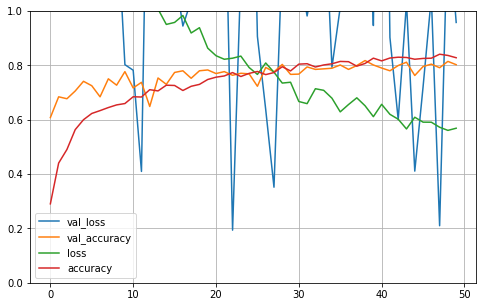

In [0]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [0]:
# test accuracy
test_loss, test_acc = model_mobilenet.evaluate_generator(test_generator,steps=50)    # change model name
print('Test Loss : ',test_loss,' Test Acc : ',test_acc) # test loss = 0.66, test_acc = 0.76

Test Loss :  3.246234178543091  Test Acc :  0.7229999899864197


Accuracy is terrible on the Test Data